### Using Tensorflow GPU.

In [ ]:
#!pip install tensorflow-gpu==2.0.0

## Connecting to Google Drive.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.chdir("/content/drive/MyDrive/DeepL/XYZ Project/Dataset")

In [7]:
!dir

level_1.csv  level_2.csv  level_3.csv  level_4.csv  XYZCorp_LendingData.txt


## Importing Libraries.

In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


%matplotlib inline

In [3]:
#Suppress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

## Loading The Dataset

In [8]:
#Importing the dataset
data = pd.read_csv('XYZCorp_LendingData.txt',delimiter='\t', low_memory=False)

In [9]:
#Checking the DataFrameShape.
data.shape

(855969, 73)

In [10]:
#Checking the Files is proper or not.
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
#Make the Copy of Orignal Dataset.

data_copy = data.copy(deep=True)

In [12]:
#Re-Checking the Data.
data_copy.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
data_copy.shape

(855969, 73)

## Checking Missing Value.

In [14]:
#Missing Values

total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
dti_joint,855529,99.948596
annual_inc_joint,855527,99.948363
verification_status_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964


### Visualising the Missing Values in Each Column For Better Understanding:



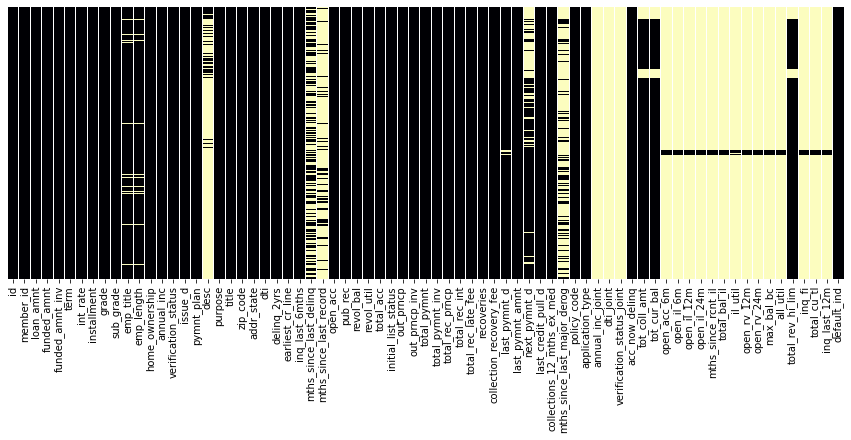

In [15]:
#Visualising the missing values by using SNS Heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

**It is evident from the above heatmap that our dataset contains a lot of missing values and we can not use feature that has so many missing values.**

**Above heatmap shows how many values are missing in every columns. All the light colored columns represents the amount of missing values present in that specific column.**

### Droping the Missing Values From The Dataset.


In [16]:
#Treating The Missing Values.
for i in data.columns:
    if missing_data.loc[i,'Percent'] >= 50:
        data=data.drop(i,axis=1)

In [17]:
data.shape

(855969, 52)

### Re-Visualising the Missing Values in Each Column After Dropping the Variables.

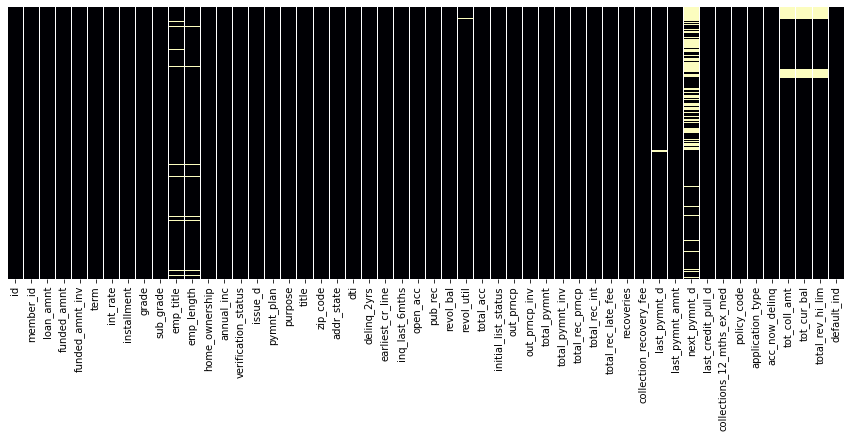

In [18]:
# Visualising the missing values in each column after dropping the variables

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

##Checking the Duplicate Records.

In [19]:
#Duplicate Records.
data.duplicated().value_counts()

False    855969
dtype: int64

##Data Types for all Variables.

In [20]:
#DataTypes
print(data.dtypes)

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

##How Many Object Type Features are Actually Categorical

In [21]:
#Categorical Checking
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              290912
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   103
pymnt_plan                  2
purpose                    14
title                   60991
zip_code                  931
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               97
next_pymnt_d                3
last_credit_pull_d        102
application_type            2
dtype: int64

##Int Columns.

In [22]:
num_col=[]

for x in data.columns[:]:
    if (data[x].dtype=='int64') | (data[x].dtype=='float64'):
        num_col.append(x)

print(num_col)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


## EDA- ***Exploratory Data Analysis.***
Using Boxplot

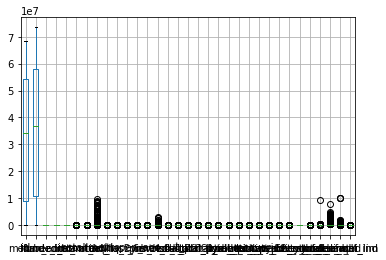

In [ ]:
#Using Boxplot for visualing the Data for better Analytics
data.boxplot()

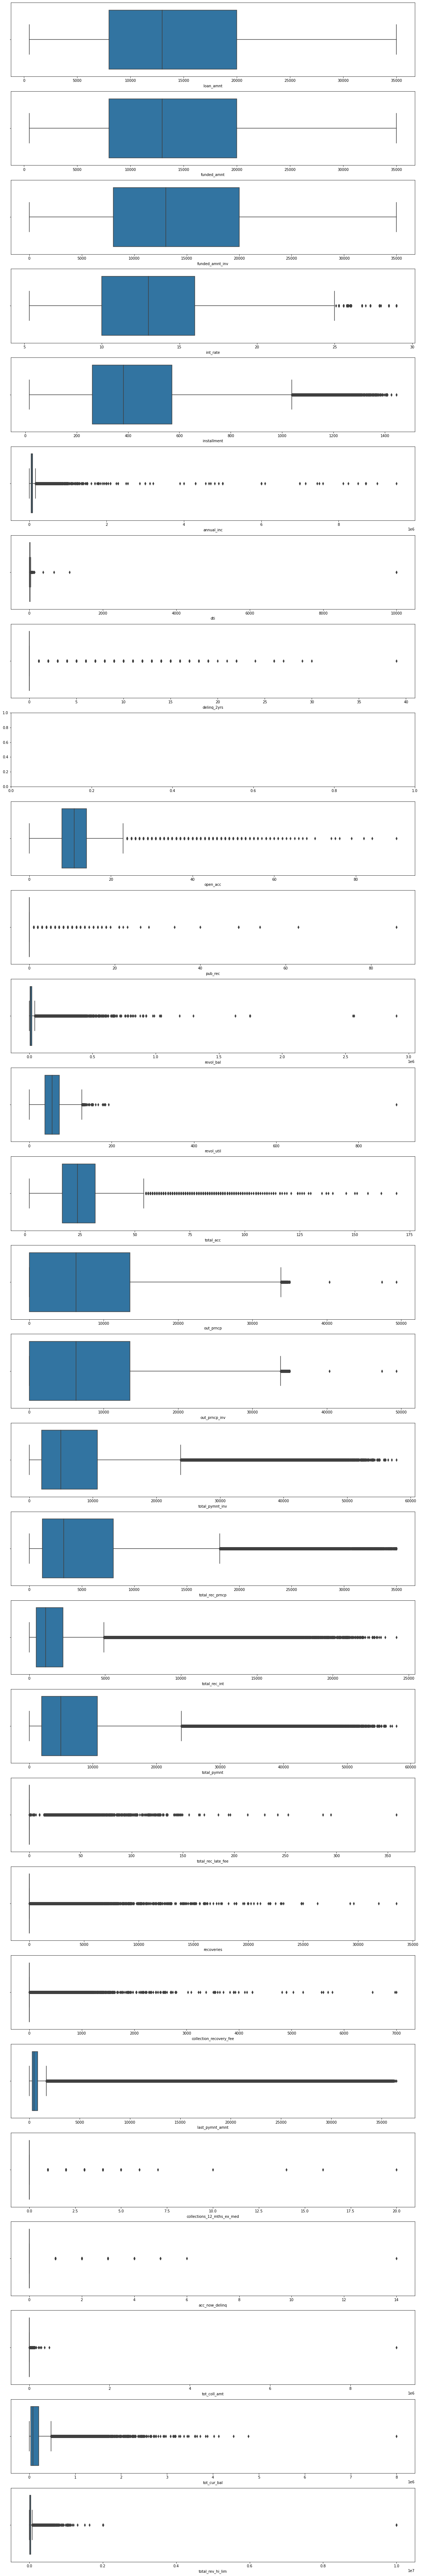

In [ ]:
fig, axs = plt.subplots(29,figsize=(20,130))

plt1 = sns.boxplot(data['loan_amnt'], ax = axs[0])
plt2 = sns.boxplot(data['funded_amnt'],ax=axs[1])
plt3 = sns.boxplot(data['funded_amnt_inv'],ax=axs[2])
plt4 = sns.boxplot(data['int_rate'],ax=axs[3])
plt5 = sns.boxplot(data['installment'],ax=axs[4])
plt6 = sns.boxplot(data['annual_inc'],ax=axs[5])
plt7 = sns.boxplot(data['dti'],ax=axs[6])
plt8 = sns.boxplot(data['delinq_2yrs'],ax=axs[7])
plt10 = sns.boxplot(data['open_acc'],ax=axs[9])
plt11 = sns.boxplot(data['pub_rec'], ax = axs[10])
plt12 = sns.boxplot(data['revol_bal'],ax=axs[11])
plt13 = sns.boxplot(data['revol_util'],ax=axs[12])
plt14 = sns.boxplot(data['total_acc'],ax=axs[13])
plt15 = sns.boxplot(data['out_prncp'],ax=axs[14])
plt16 = sns.boxplot(data['out_prncp_inv'],ax=axs[15])
plt17 = sns.boxplot(data['total_pymnt_inv'],ax=axs[16])
plt18 = sns.boxplot(data['total_rec_prncp'],ax=axs[17])
plt19 = sns.boxplot(data['total_rec_int'],ax=axs[18])
plt20 = sns.boxplot(data['total_pymnt'],ax=axs[19])
plt21 = sns.boxplot(data['total_rec_late_fee'], ax = axs[20])
plt22 = sns.boxplot(data['recoveries'],ax=axs[21])
plt23 = sns.boxplot(data['collection_recovery_fee'],ax=axs[22])
plt24 = sns.boxplot(data['last_pymnt_amnt'],ax=axs[23])
plt25 = sns.boxplot(data['collections_12_mths_ex_med'],ax=axs[24])
plt26 = sns.boxplot(data['acc_now_delinq'],ax=axs[25])
plt27 = sns.boxplot(data['tot_coll_amt'],ax=axs[26])
plt28 = sns.boxplot(data['tot_cur_bal'],ax=axs[27])
plt29 = sns.boxplot(data['total_rev_hi_lim'],ax=axs[28])



#plt.tight_layout()
plt.show()


# Data Visualization.

In [ ]:
# Checking the value counts of  Default Customer. 
data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [ ]:
#Converting into Percentage to check the default Customer.
Non_Default = round(data['default_ind'].value_counts()[0]/len(data) * 100, 2)

Default = round(data['default_ind'].value_counts()[1]/len(data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(Non_Default))
print('Default Customer : {} % of the dataset'.format(Default))



Non_Default Customer : 94.57 % of the dataset
Default Customer : 5.43 % of the dataset


**Here we can see that 94.57% are Non_Default Customer in the dataset and 5.43% are the Default Customer in the dataset.**

Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

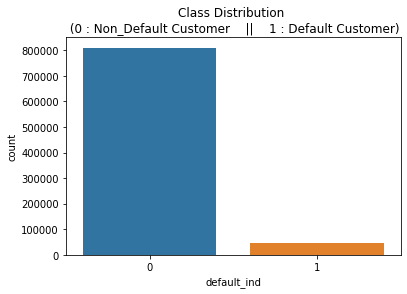

In [ ]:
#using Countplot to visualizes
sns.countplot('default_ind', data=data)
plt.title('Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

## Loan Term Distribution.

Text(0, 0.5, 'Count')

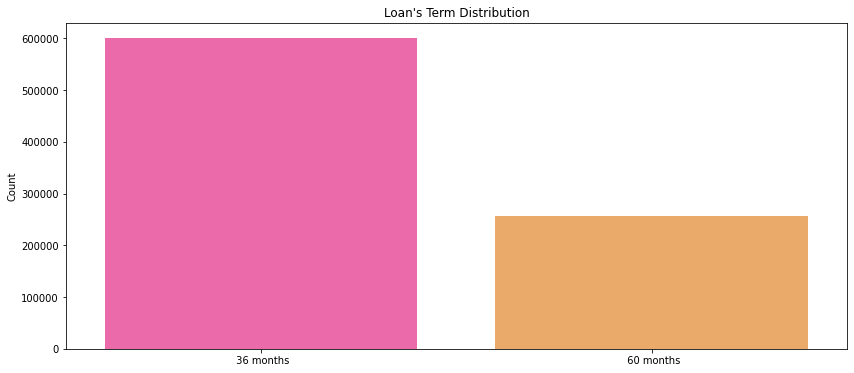

In [ ]:
#Loan Distribution by using barplot.
plt.figure(figsize=(14, 6))
sns.barplot(y=data.term.value_counts(), x=data.term.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

In [ ]:
#Converting into Percentage to check the Loan Customer.
Loan3years = round(data['term'].value_counts()[0]/len(data) * 100, 2)

Loan5years = round(data['term'].value_counts()[1]/len(data) * 100, 2)

print('Loan3years Customer : {} % of the dataset'.format(Loan3years))
print('Loan5years Customer : {} % of the dataset'.format(Loan5years))



Loan3years Customer : 70.12 % of the dataset
Loan5years Customer : 29.88 % of the dataset


**we can see that most of the people having a loan of 3 years are 70.12% and loan for 5 years are 29.88%.**

## Loan amount distribution.

Text(0.5, 1.0, 'Funded Amount Distribution')

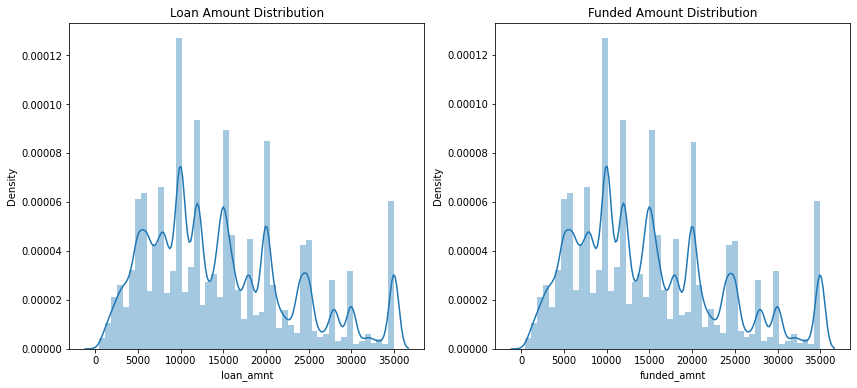

In [ ]:
#Loan amt distibution by displot 
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")

sns.distplot(data['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

Text(0.5, 1.0, 'Interest Rates Distribution')

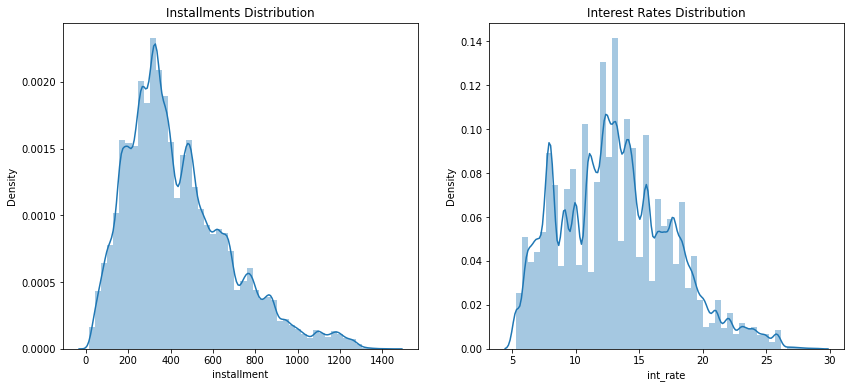

In [ ]:
# Installment and Interest rates distribution by using displot.
fig, ax = plt.subplots(1, 2, figsize=(14,6))


sns.distplot(data['installment'], ax=ax[0])
ax[0].set_title("Installments Distribution")

sns.distplot(data['int_rate'], ax=ax[1])
ax[1].set_title("Interest Rates Distribution")

## Grade Count.

Text(0.5, 1.0, 'Grade Count')

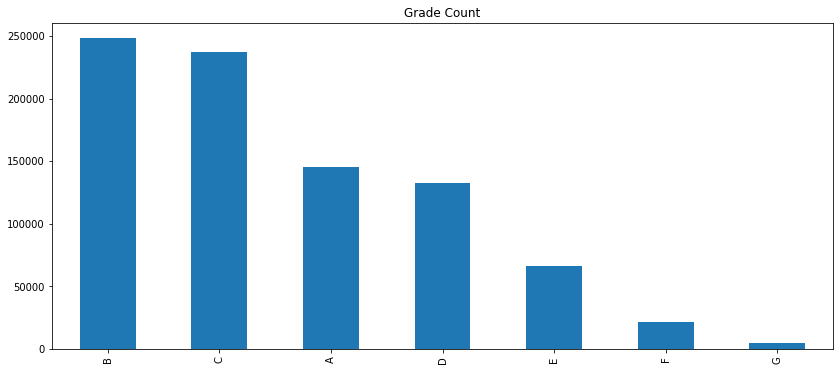

In [ ]:
# Grade Count using barplot 
plt.figure(figsize=(14, 6))

data.grade.value_counts().plot(kind='bar').set_title('Grade Count')

**It appears to be "B" & "C" Grade are the dominates ones.**

##Loan purpose.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

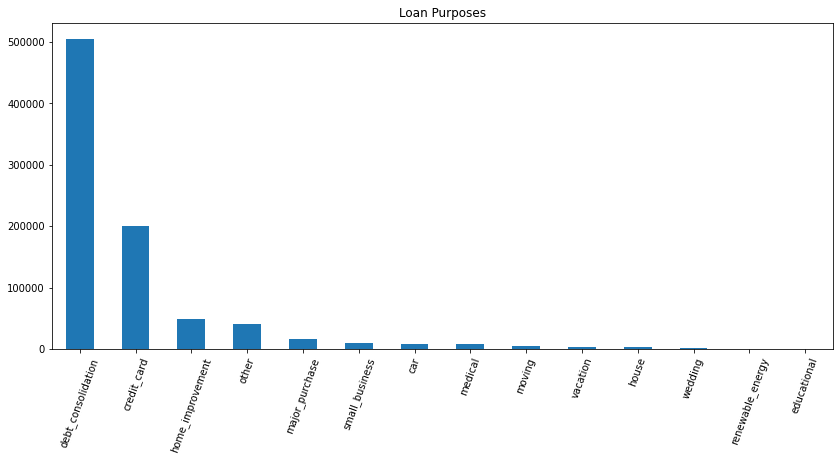

In [ ]:
#Loan purpose by using barplot 
plt.figure(figsize=(14, 6))

data.purpose.value_counts().plot(kind='bar').set_title('Loan Purposes')
plt.xticks(rotation=70)

**It apperas to be majority of people having loan for  debt_consolidation and credit_card and where less people having a loan for educational.**

Loan Amount Distribution BoxPlot


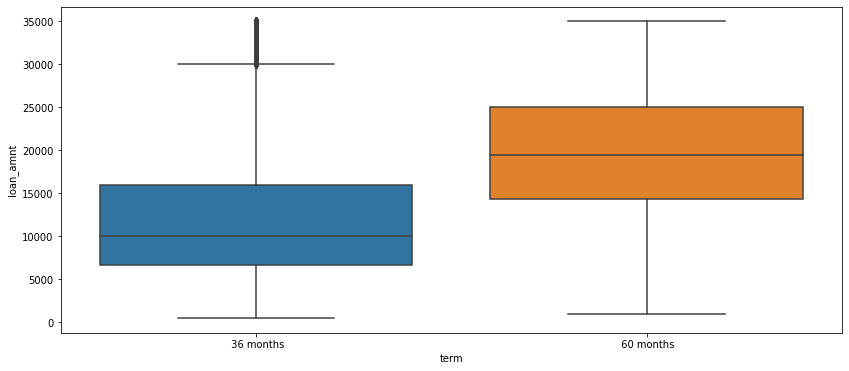

In [ ]:

print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(14,6))
sns.boxplot(x=data.term, y=data.loan_amnt)

Text(0, 0.5, 'Loan Amount')

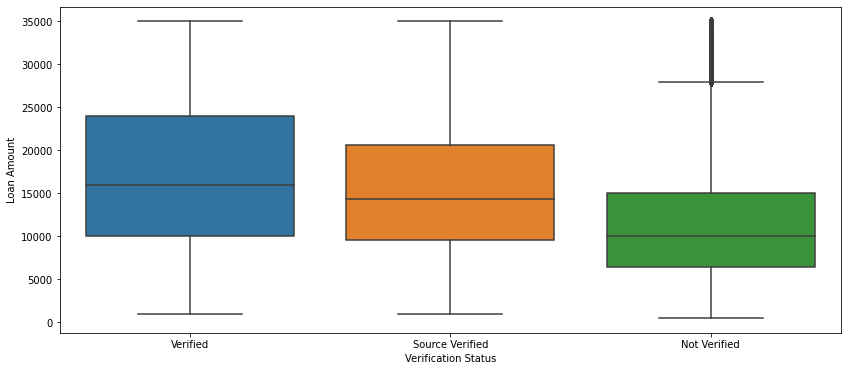

In [ ]:
plt.figure(figsize=(14,6)) 

sns.boxplot(x=data.verification_status, y=data.loan_amnt)

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

## Loan Amount by Verification Status.

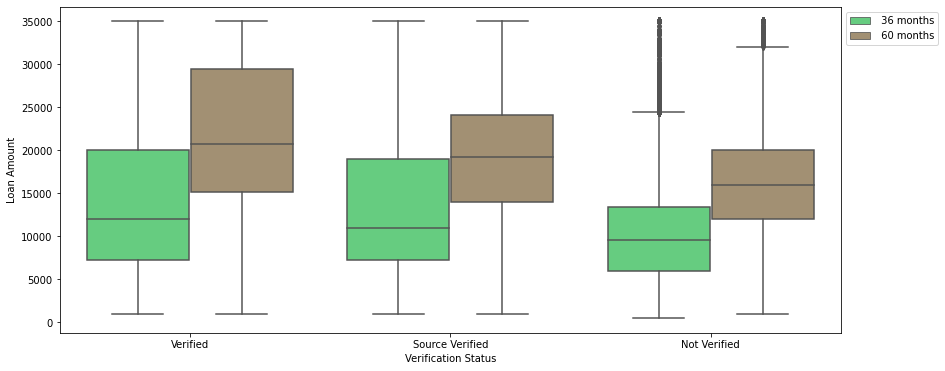

In [ ]:
#Loan amt verification status using the boxplot.
plt.figure(figsize=(14,6))

sns.boxplot(x=data.verification_status, y=data.loan_amnt, hue=data.term, palette="terrain")

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

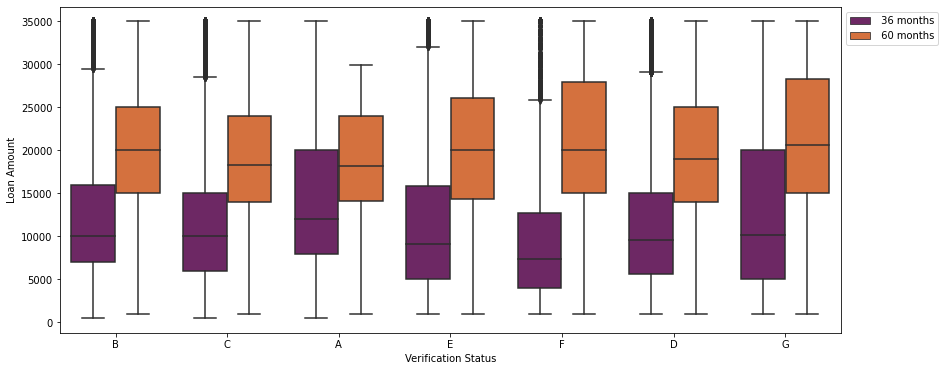

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x=data.grade, y=data.loan_amnt, hue=data.term, palette="inferno")

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

##Issues_id

**Create a function that will split the issue_d varibale which is nothing but the The month which the loan was funded.**



In [ ]:
## Splitting issues_id into months.
def getMonth(x):
    return x.split('-')[0]


def getYear(x):
    return x.split('-')[1]


data['Month'] = data.issue_d.apply(getMonth)
data['Year'] = data.issue_d.apply(getYear)

In [ ]:
##Data_shape
data.shape

(855969, 54)

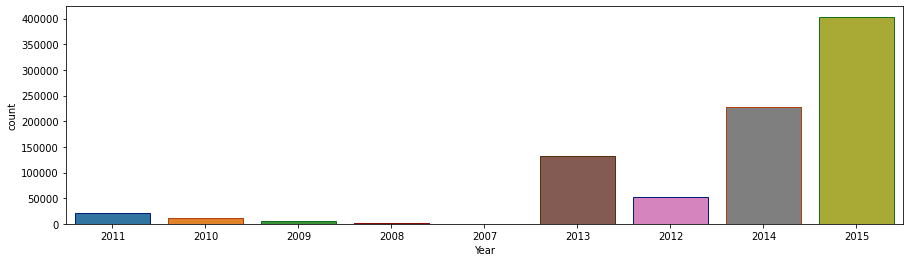

In [ ]:
## years
plt.figure(figsize=(15, 4))

sns.countplot(x="Year", data=data, edgecolor=sns.color_palette("dark", 6))

**Xponential rise in the number of applications over a period of years.** 

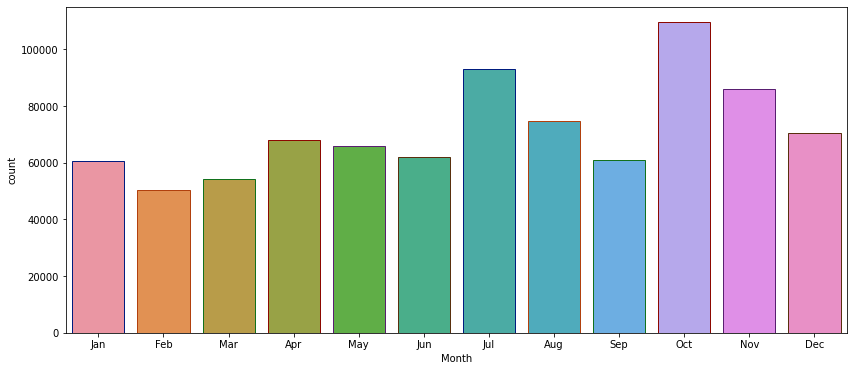

In [ ]:
#checking by months
order_by = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))

sns.countplot(x="Month", data=data, edgecolor=sns.color_palette("dark", 6), order=order_by)

**Seems that October and July have the highest number of applications.**

## Loan Amount by Months

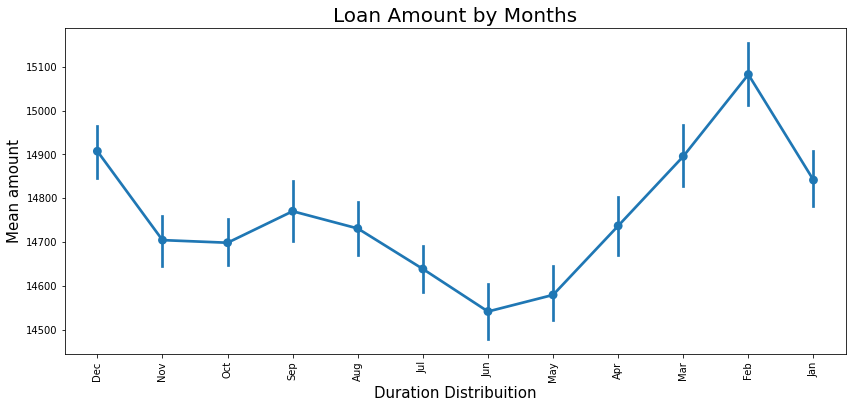

In [ ]:
#Loans amt by months
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt',data=data)


g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.show()

## Loan Amount by Months and Grade

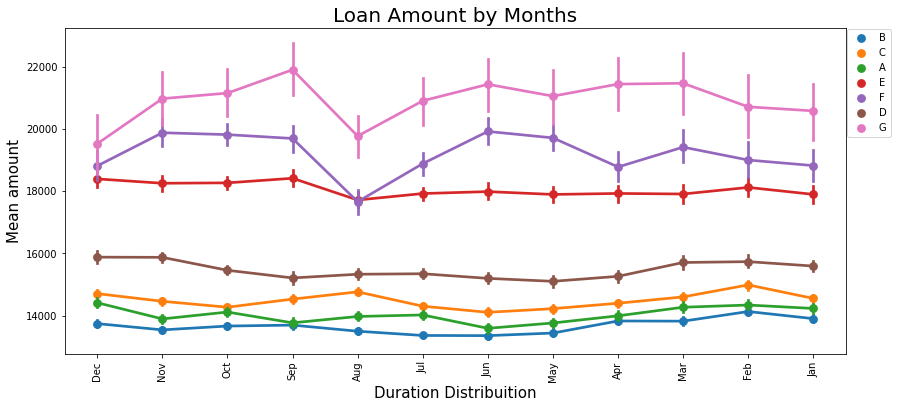

In [ ]:
# Loan amt by months and grades
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt', data=data, hue='grade')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.10)

plt.show()

## Loan Amount by Months and term

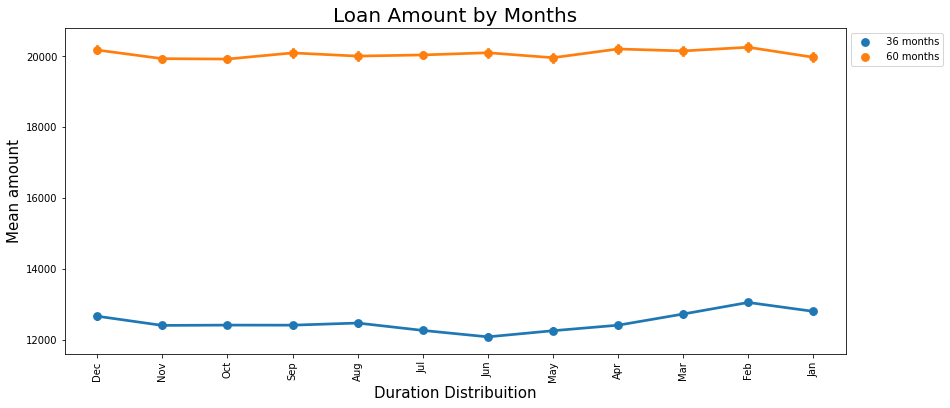

In [ ]:
#Loan amt by months and term
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Month', y='loan_amnt',data=data, hue='term')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

plt.show()

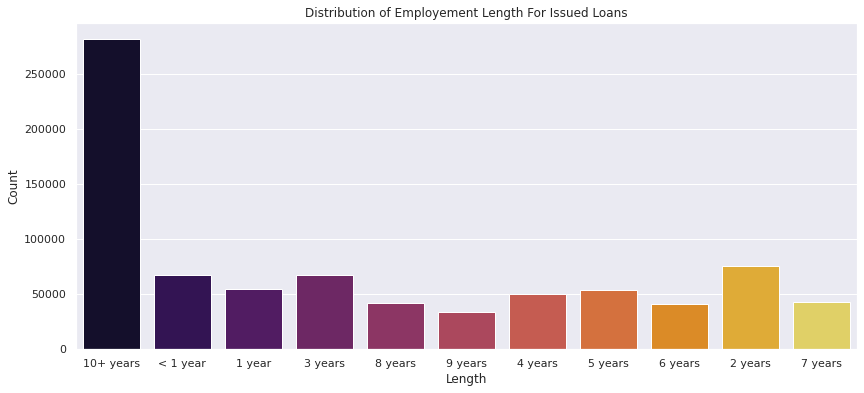

In [ ]:
sns.set(rc={'figure.figsize':(14,6)})
sns.countplot(data['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()



Text(0, 0.5, 'Data type')

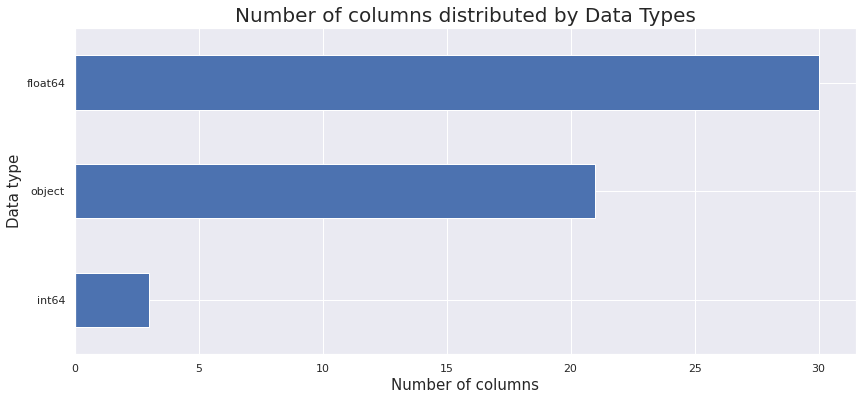

In [ ]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

# Export level 1

In [23]:
data.to_csv('level_1.csv')

In [24]:
# Importing the dataset
data = pd.read_csv('level_1.csv',index_col=0,low_memory=False)



In [25]:
data.shape

(855969, 52)

In [26]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,4.0,0.0,8221.0,87.5,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,11.0,0.0,5210.0,32.6,13.0,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-2012,152.39,NaN,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,2.0,0.0,9279.0,36.5,3.0,f,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5

# Droping the Irrelevant Columns. 

In [27]:
# id variable because its a unique number
data=data.drop('id',axis=1)

# member_id variable because its a unique number
data=data.drop('member_id',axis=1)

# zip_code variable because its a unique number
data=data.drop('zip_code',axis=1)

# policy_code variable because it has same value for all observation
data=data.drop('policy_code',axis=1)

# payment_plan variable because it has same value for all observation
data=data.drop('pymnt_plan',axis=1)

# emp_title variable because it's a categorical varibale with (290912 level)
data=data.drop('emp_title',axis=1)

# last_credit_pull_d variable because it's a date varibale with (102 level)
data=data.drop('last_credit_pull_d',axis=1)

# title variable because it's a categorical varibale with (61000 level)
data=data.drop('title',axis=1)

# next_pymnt_d variable because 
# it's a date varibale with (3 level) and it contains 29% Missing info.
data=data.drop('next_pymnt_d',axis=1)

# earliest_cr_line variable because it's a date varibale with (697 level)
data=data.drop('earliest_cr_line',axis=1)

# addr_state variable for trail purpose (51 level)
data=data.drop('addr_state',axis=1)

# last_pymnt_d variable for trail purpose (51 level)
data=data.drop('last_pymnt_d',axis=1)

# application_type is 'INDIVIDUAL' for 99.94% of the records
data=data.drop('application_type',axis=1)

# acc_now_delinq is 0 for 99.5% of the records
data=data.drop('acc_now_delinq',axis=1)

In [28]:
#re-Checking that values are drop or not 
data.shape

(855969, 38)

## Missing Value Treatment

In [29]:
## Using Mean

# tot_cur_bal
data['tot_cur_bal'].fillna(int(data['tot_cur_bal'].mean()),inplace=True)

# tot_coll_amt
data['tot_coll_amt'].fillna(int(data['tot_coll_amt'].mean()),inplace=True)

# total_rev_hi_lim
data['total_rev_hi_lim'].fillna(int(data['total_rev_hi_lim'].mean()),inplace=True)

# revol_utill
data['revol_util'].fillna(int(data['revol_util'].mean()),inplace=True)



In [30]:
## Using Mode
data['collections_12_mths_ex_med'].value_counts()

0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
16.0         1
20.0         1
7.0          1
10.0         1
14.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [31]:
# collections_12_mths_ex_med
data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mode()[0],inplace=True)

# emp_length
data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)

## Check Missing Value

In [32]:
#Checking Missing values again
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
loan_amnt,0,0.0
total_rec_int,0,0.0
total_acc,0,0.0
initial_list_status,0,0.0
out_prncp,0,0.0
out_prncp_inv,0,0.0
total_pymnt,0,0.0
total_pymnt_inv,0,0.0
total_rec_prncp,0,0.0
total_rec_late_fee,0,0.0


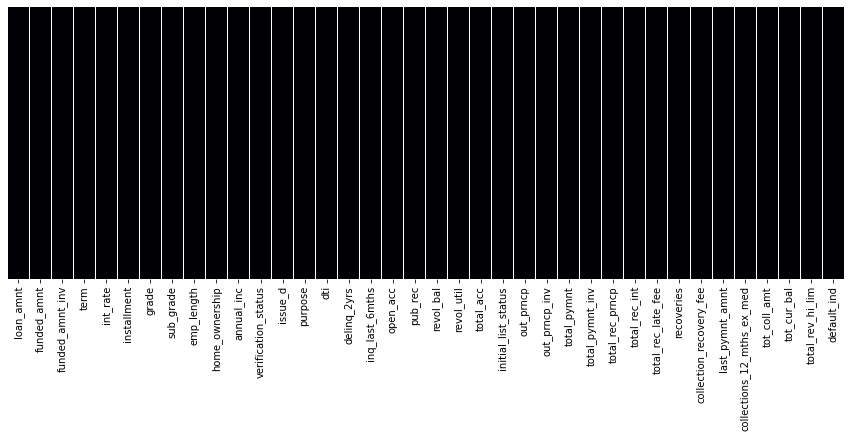

In [33]:
# Visualising the missing values in each column after dropping the variables

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

**After Visualizing we can clearly see that their is no missing value is repersent in the dataset.**

# level 2 Export 

In [34]:
data.to_csv('level_2.csv')

In [35]:
#Importing the time Library
import time

In [36]:
# Importing the dataset
start = time.time()

data_copy = pd.read_csv('level_2.csv',index_col=0,low_memory = False)
#index_col=0,header=None

end = time.time()
print(end - start)

6.388943433761597


In [37]:
data.shape

(855969, 38)

## emp_length ( 11 level)

****

In [38]:
data['emp_length'].value_counts()

10+ years    325151
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [39]:
data['emp_length'] = data['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10})

In [40]:
data['emp_length'].value_counts()

10    325151
2      75986
0      67597
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

## Term (2 level)

**The number of payments on the loan. Values are in months and can be either 36 or 60.**

In [41]:
data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [42]:
# map function not working so will replace it with 1 and 2
data['term'] = data['term'].replace({'36 months':1,'60 months':2},regex = True)

In [43]:
data['term'].value_counts()

1    600221
2    255748
Name: term, dtype: int64

## initial_list_status (2 level)

**Indicates whether the loan is an individual application or a joint application with two co-borrowers**

In [44]:
data['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [45]:
data['initial_list_status'] = data['initial_list_status'].map({'f':1,'w':2})

In [46]:
data['initial_list_status'].value_counts()

1    442555
2    413414
Name: initial_list_status, dtype: int64

## verification_status (3 level)

**Was the income source verified**

In [47]:
data['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [48]:
data['verification_status'] = data['verification_status'].map({'Source Verified':1,'Verified':2, 'Not Verified':3})

In [49]:
data['verification_status'].value_counts()

1    318178
2    280049
3    257742
Name: verification_status, dtype: int64

##home_ownership (6 level)

**The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.**

In [50]:
data['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [51]:
data['home_ownership'] = data['home_ownership'].map({'MORTGAGE':1,'RENT':2,'OWN':3,'OTHER':4,'NONE':5,'ANY':6})

In [52]:
data['home_ownership'].value_counts()

1    429106
2    342535
3     84136
4       144
5        45
6         3
Name: home_ownership, dtype: int64

## Grade (7 level)

**XYZ corp. assigned loan grade**

In [53]:
data['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [54]:
data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [55]:
data['grade'].value_counts()

2    247998
3    236855
1    145665
4    132802
5     66448
6     21328
7      4873
Name: grade, dtype: int64

## purpose (14 level)

**A category provided by the borrower for the loan request.**

In [56]:
data['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [57]:
data['purpose'] = data['purpose'].map({'debt_consolidation':1, 'credit_card':2, 
                                       'home_improvement':3, 'other':4, 'major_purchase':5, 
                                       'small_business':6, 'car':7, 'medical':8,
                                       'moving':9, 'vacation':10, 'house':11,'wedding':12,
                                       'renewable_energy':13,'educational':14})


In [58]:
data['purpose'].value_counts()

1     505392
2     200144
3      49956
4      40949
5      16587
6       9785
7       8593
8       8193
9       5160
10      4542
11      3513
12      2280
13       549
14       326
Name: purpose, dtype: int64

## Variable Drop



In [ ]:
# sub_grade variable for trail purpose (35 level)
data=data.drop('sub_grade',axis=1)


#Droping  Months
data=data.drop('Month',axis=1)

#Dropping Year
data=data.drop( 'Year',axis=1)




In [60]:
data.shape

(855969, 37)

# Level 3 Export

In [61]:
data.to_csv('level_3.csv')

In [62]:
# Importing the dataset
data = pd.read_csv('level_3.csv',index_col=0, low_memory=False)

In [63]:
data.shape

(855969, 37)

In [64]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,1,10.65,162.87,2,10,2,24000.0,2,Dec-2011,2,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,1,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,225.0,139766.0,32163.0,0
1,2500.0,2500.0,2500.0,2,15.27,59.83,3,0,2,30000.0,1,Dec-2011,7,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,1,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,225.0,139766.0,32163.0,1
2,2400.0,2400.0,2400.0,1,15.96,84.33,3,10,2,12252.0,3,Dec-2011,6,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,1,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,225.0,139766.0,32163.0,0
3,10000.0,10000.0,10000.0,1,13.49,339.31,3,10,2,49200.0,1,Dec-2011,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,1,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,225.0,139766.0,32163.0,0
4,3000.0,3000.0,3000.0,2,12.69,67.79,2,1,2,80000.0,1,Dec-2011,4,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,1,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,225.0,139766.0,32163.0,0


## Data Partition

*train --> ( June 2007 – May 2015 )

test --> ( June 2015 – Dec 2015 )

So I have decided to treat the date column(‘issue_d’).First, I split the column(‘issue_d’) into two different columns and replace the values as my requirement.After that with the help of map function I joined the splited columns and make them one with different name (‘period’). Then I sort the ‘period’ column and make it an index for slicing according to the requirement*

In [65]:
data['str_split'] = data.issue_d.str.split('-')

In [66]:
data['m'] = data.str_split.str.get(0)

In [67]:
data['y']=data.str_split.str.get(1)

In [68]:
data['m'] = data['m'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                                  ,regex = True)

In [69]:
data["period"] = data["y"].map(str) + data["m"]

In [70]:
data_sort = data.sort_values('period')

In [71]:
data_sort.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,str_split,m,y,period
39693,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,Jun-2007,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,"[Jun, 2007]",06,2007,200706
39671,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,Jul-2007,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707
39659,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,Jul-2007,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707
39660,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,Jul-2007,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707
39666,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,Jul-2007,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007,200707


In [72]:
data_sort_index = data_sort.set_index('period')

In [73]:
data_sort_index.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,str_split,m,y
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,Jun-2007,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0,"[Jun, 2007]",06,2007
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,Jul-2007,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,Jul-2007,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,Jul-2007,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,Jul-2007,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0,"[Jul, 2007]",07,2007


### Droping the irrevelent columns

In [74]:
# issue_d
data_sort_index=data_sort_index.drop('issue_d',axis=1)

# str_split
data_sort_index=data_sort_index.drop('str_split',axis=1)


# m
data_sort_index=data_sort_index.drop('m',axis=1)


# y
data_sort_index=data_sort_index.drop('y',axis=1)


data_sort_index.shape

(855969, 36)

In [75]:
data_sort_index.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0


# Level 4 Export

In [76]:
data_sort_index.to_csv('level_4.csv')

In [77]:
# Importing the dataset
data = pd.read_csv('level_4.csv',index_col=0,low_memory=False)

In [78]:
data.shape

(855969, 36)

**As per the requirement i have sliced the data in train and test.**

# Train

In [79]:
train_data = data.loc['200706':'201505',:]

In [80]:
train_data.shape

(598978, 36)

In [81]:
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0
200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0
200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0
200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0


# Test

In [82]:
test_data = data.loc['201506':'201512',:]

In [83]:
test_data.shape

(256991, 36)

In [84]:
test_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201506,35000.0,35000.0,35000.0,1,9.17,1115.77,2,1,1,130000.0,2,1,26.59,0.0,0.0,25.0,0.0,45846.0,65.0,44.0,2,28923.94,28923.94,7792.56,7792.56,6076.06,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0,0
201506,11500.0,11500.0,11475.0,2,9.17,239.68,2,10,2,74000.0,1,1,23.61,0.0,0.0,7.0,0.0,20480.0,61.1,11.0,2,10571.62,10548.63,1432.22,1429.11,928.38,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0,0
201506,12000.0,12000.0,12000.0,2,15.61,289.34,4,2,2,48000.0,1,1,31.40,0.0,1.0,9.0,0.0,15264.0,74.8,23.0,2,11174.11,11174.11,1725.63,1725.63,825.89,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0,0
201506,35000.0,35000.0,35000.0,1,12.29,1167.36,3,3,1,121000.0,2,1,22.18,3.0,0.0,10.0,0.0,27999.0,76.9,35.0,2,29160.72,29160.72,8167.03,8167.03,5839.28,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0,0
201506,27000.0,27000.0,27000.0,2,8.18,549.80,2,10,1,100000.0,1,2,18.73,0.0,0.0,16.0,0.0,28486.0,61.0,39.0,2,24386.79,24386.79,3824.06,3824.06,2613.21,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0,0


# Export train data and test data

In [85]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

In [86]:
train_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [87]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]

**Seprate featrues and labels**

## Train

In [92]:
x_train = pd.DataFrame(train_data.values[:,:-1],columns=x_cols)

In [93]:
x_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,7500.0,7500.0,800.0,1.0,13.75,255.43,5.0,0.0,3.0,22000.0,3.0,1.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0
1,5000.0,5000.0,4150.0,1.0,7.43,155.38,1.0,8.0,1.0,150000.0,3.0,3.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0
2,5750.0,5750.0,3675.0,1.0,7.43,178.69,1.0,10.0,1.0,125000.0,3.0,1.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0
3,5000.0,5000.0,3975.0,1.0,7.43,155.38,1.0,6.0,2.0,40000.0,3.0,7.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0
4,1200.0,1200.0,0.0,1.0,11.54,39.60,3.0,0.0,2.0,20000.0,3.0,2.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0


In [94]:
y_train = pd.DataFrame(train_data.values[:,-1],columns=y_cols)


In [95]:
y_train.head()

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# Test

In [96]:
x_test = pd.DataFrame(test_data.values[:,:-1],columns=x_cols)

In [97]:
x_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,35000.0,35000.0,35000.0,1.0,9.17,1115.77,2.0,1.0,1.0,130000.0,2.0,1.0,26.59,0.0,0.0,25.0,0.0,45846.0,65.0,44.0,2.0,28923.94,28923.94,7792.56,7792.56,6076.06,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0
1,11500.0,11500.0,11475.0,2.0,9.17,239.68,2.0,10.0,2.0,74000.0,1.0,1.0,23.61,0.0,0.0,7.0,0.0,20480.0,61.1,11.0,2.0,10571.62,10548.63,1432.22,1429.11,928.38,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0
2,12000.0,12000.0,12000.0,2.0,15.61,289.34,4.0,2.0,2.0,48000.0,1.0,1.0,31.40,0.0,1.0,9.0,0.0,15264.0,74.8,23.0,2.0,11174.11,11174.11,1725.63,1725.63,825.89,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0
3,35000.0,35000.0,35000.0,1.0,12.29,1167.36,3.0,3.0,1.0,121000.0,2.0,1.0,22.18,3.0,0.0,10.0,0.0,27999.0,76.9,35.0,2.0,29160.72,29160.72,8167.03,8167.03,5839.28,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0
4,27000.0,27000.0,27000.0,2.0,8.18,549.80,2.0,10.0,1.0,100000.0,1.0,2.0,18.73,0.0,0.0,16.0,0.0,28486.0,61.0,39.0,2.0,24386.79,24386.79,3824.06,3824.06,2613.21,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0


In [98]:
y_test = pd.DataFrame(test_data.values[:,-1],columns=y_cols)

In [99]:
y_test.head()

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_scale = pd.DataFrame(sc.fit_transform(x_train),columns=x_cols)
x_test_scale = pd.DataFrame(sc.transform(x_test),columns=x_cols)

In [101]:
x_train_scale.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.844559,-0.843203,-1.640620,-0.634014,0.052412,-0.737495,1.682281,-1.698028,2.149639,-0.915633,1.286434,-0.521055,-0.414882,0.848153,-0.730864,-0.847976,-0.32479,-0.589107,-0.183001,-1.470150,-0.809528,-0.811282,-0.811236,-0.108522,-1.121129,-0.033334,-0.255238,-0.103534,-0.136873,-0.094862,-0.474069,-0.09384,0.001194,0.00479,0.02725
1,-1.144446,-1.143412,-1.238829,-0.634014,-1.393496,-1.149406,-1.365338,0.492187,-0.900245,1.339413,1.286434,0.567029,-2.185476,-0.358617,-0.730864,-1.821052,-0.32479,-0.499397,-1.532957,-0.531397,-0.809528,-0.811282,-0.811236,-0.605437,-0.710525,-0.394434,-0.924911,-0.103534,-0.136873,-0.094862,0.292991,-0.09384,0.001194,0.00479,0.02725
2,-1.054480,-1.053349,-1.295800,-0.634014,-1.393496,-1.053437,-1.365338,1.039741,-0.900245,0.898974,1.286434,-0.521055,-2.152022,-0.358617,-0.730864,-0.264131,-0.32479,-0.653977,-1.925287,-0.787420,-0.809528,-0.811282,-0.811236,-0.451285,-0.734114,-0.286104,-0.705917,-0.103534,-0.136873,-0.094862,-0.520722,-0.09384,0.001194,0.00479,0.02725


In [102]:
x_test_scale.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,2.454199,2.459100,2.461237,-0.634014,-0.995414,2.804565,-0.603433,-1.424251,-0.900245,0.987062,0.053295,-0.521055,1.109142,-0.358617,-0.730864,2.655096,-0.32479,1.401471,0.386512,1.602133,1.235288,3.134612,3.135597,-0.281841,-0.277114,-0.239008,-0.245762,-0.103534,-0.136873,-0.094862,-0.314914,-0.09384,-0.017634,0.613777,1.145613
1,-0.364740,-0.362868,-0.360289,1.577252,-0.995414,-0.802339,-0.603433,1.039741,0.624697,0.000479,-1.179845,-0.521055,0.739907,-0.358617,-0.730864,-0.847976,-0.32479,0.189765,0.221986,-1.214126,1.235288,0.630931,0.628184,-1.067889,-1.065564,-0.982540,-0.779744,-0.103534,-0.136873,-0.094862,-0.477202,-0.09384,-0.017634,-0.572443,0.066253


# Export all files

In [103]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
x_train_scale.to_csv('x_train_scale.csv')
x_test_scale.to_csv('x_test_scale.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

**I'm Dividing the codes files into two because this file got bigger an taking to much spaces, so will contiune your training and testing data into second code file**